In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
%matplotlib inline

In [2]:
def find_closest_centroids(X, centroids):  
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    return idx

In [8]:
data = loadmat('ex7data2.mat')  
X = data['X']  
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)  
idx [0:3]

array([ 0.,  2.,  1.])

In [9]:
def compute_centroids(X, idx, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))

    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()

    return centroids

In [11]:
def run_k_means(X, initial_centroids, max_iters):  
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)

    return idx, centroids

idx, centroids = run_k_means(X, initial_centroids, 10)  

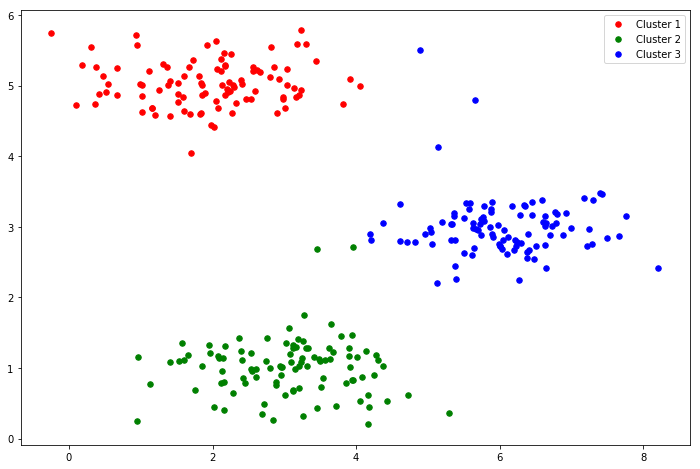

In [14]:
cluster1 = X[np.where(idx == 0)[0],:]  
cluster2 = X[np.where(idx == 1)[0],:]  
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')  
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')  
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')  
ax.legend()  

In [21]:
def init_centroids(X, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
        
    for i in range(k):
        centroids[i,:] = X[idx[i],:]

    return centroids

init_centroids(X, 3)  
    

array([[ 0.59607843,  0.57647059,  0.61176471],
       [ 0.60784314,  0.47058824,  0.20784314],
       [ 0.27843137,  0.30196078,  0.38039216]])

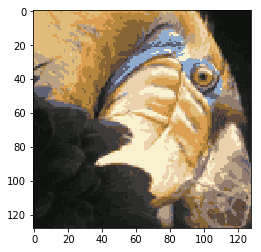

In [22]:
image_data = loadmat('bird_small.mat')  
A = image_data['A']
A = A/255
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))

# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)  